## Observations and Insights 

###  Equal number of male and female mice are taken for the study.
### There is a positve correlatio between the mouse weight and the tumor volume
### There is a negative correlatin between tumor volume and time point


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from IPython.display import display, Markdown

pd.options.mode.chained_assignment = None  # default='warn'
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
# Merge our two data frames together
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


In [3]:
# Display the data table for preview

def printmd(string):
    display(Markdown(string))
printmd('***Combined Mouse Data***')


combined_mouse_data.head()

***Combined Mouse Data***

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
total_mice = len(mouse_metadata["Mouse ID"])
print (f" Number of Mice  = {total_mice}")

 Number of Mice  = 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#df.drop_duplicates('Mouse ID', inplace=True)

combined_mouse_data.loc[combined_mouse_data.duplicated(),:]
combined_mouse_data.loc[combined_mouse_data.duplicated(keep=False),:]

#combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data.loc[combined_mouse_data.duplicated(),:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data= combined_mouse_data.drop_duplicates(keep="first")

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice=len(cleaned_mouse_data["Mouse ID"])
print (f" Number of Mice in clean DataFrame = {clean_mice}")

 Number of Mice in clean DataFrame = 1892


In [9]:
#renaming columns for easy access
cols = ["Mouse_ID", "Drug_Regimen", "Sex","Age_months","Weight","Timepoint", "Tumor_Volume", "Metastatic_Sites"]
                            
cleaned_mouse_data.columns = cols
cleaned_mouse_data.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
m_mean=cleaned_mouse_data.groupby("Drug_Regimen").Tumor_Volume.mean()
m_median=cleaned_mouse_data.groupby("Drug_Regimen").Tumor_Volume.median()
m_std=cleaned_mouse_data.groupby("Drug_Regimen").Tumor_Volume.std()
m_sem=cleaned_mouse_data.groupby("Drug_Regimen").Tumor_Volume.sem()
m_count = cleaned_mouse_data.groupby("Drug_Regimen").Tumor_Volume.count()

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#cleaned_mouse_data.groupby("Drug_Regimen").Tumor_Volume.agg(["mean","median","std","var","sem"])
summary_df=cleaned_mouse_data.groupby("Drug_Regimen").Tumor_Volume.agg(["count","mean","median","std","var","sem"])
regimen=summary_df.index


def printmd(string):
    display(Markdown(string))
printmd('***Summary Statistics by Drug Regimen***')
summary_df


***Summary Statistics by Drug Regimen***

,count,mean,median,std,var,sem
Drug_Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,160,52.368318,50.909965,6.502160,42.278090,0.514041
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of measurements taken for each Drug Regimen'}, xlabel='Drug_Regimen', ylabel='Number of measurements taken'>

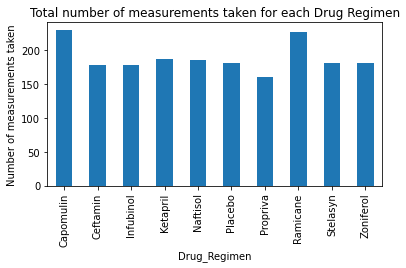

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
m_count.plot(kind='bar', figsize=(6,3))
#plt.title("Total number of measurements taken for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of measurements taken")
plt.title("Total number of measurements taken for each Drug Regimen")

m_count.plot(kind='bar', figsize=(6,3))


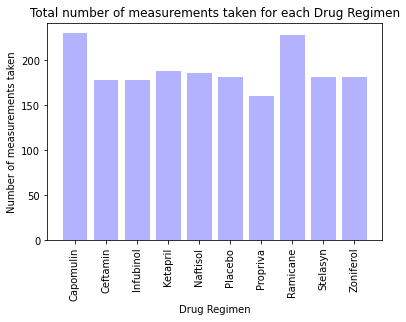

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(summary_df["count"]))
m_regimen = [summary_df.index[value] for value in x_axis]
y_axis= [summary_df["count"][value]  for value in x_axis]
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, color='b', alpha=0.3, align="center")
plt.title("Total number of measurements taken for each Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of measurements taken")
plt.xticks(tick_locations, m_regimen, rotation='vertical')
plt.show()

958

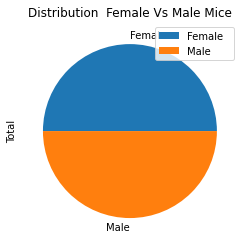

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_female_mouse = len(cleaned_mouse_data.loc[cleaned_mouse_data.Sex == "Female"])
total_male_mouse = len(cleaned_mouse_data.loc[cleaned_mouse_data.Sex == "Male"])
mouse_dic= {"Sex": ["Female", "Male"],
          "Total": [total_male_mouse, total_male_mouse]}
mouse_df = pd.DataFrame(mouse_dic)
mouse_df.set_index("Sex", inplace = True)
mouse_df.plot(kind="pie", y="Total",radius=1, title="Distribution  Female Vs Male Mice", legend=False)
plt.legend(["Female  ","Male"])
mouse_df["Total"][0]

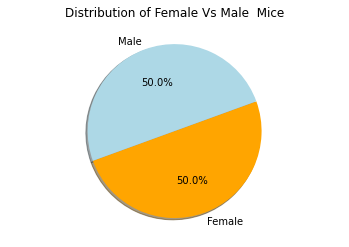

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = mouse_df.index
y_axis = mouse_df["Total"]
# The values of each section of the pie chart
#y_axis= [mouse_df["Total"][value]  for value in x_axis]

# The colors of each section of the pie chart
colors = ["orange","lightblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)

# Creates the pie chart based upon the values above
plt.axis("equal")
# Automatically finds the percentages of each part of the pie chart
plt.pie(y_axis, explode=explode, labels=labels, colors=colors,
        autopct="%4.1f%%", shadow=True, startangle=200,radius=1)
plt.title("Distribution of Female Vs Male  Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cleaned_mouse_data['max_time_point'] = cleaned_mouse_data.groupby(['Mouse_ID'])['Timepoint'].transform(max)
cleaned_mouse_data.head()


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites,max_time_point
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']



In [18]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
select_treatment_df=cleaned_mouse_data.query('Drug_Regimen == "Ramicane" or Drug_Regimen== "Capomulin" or Drug_Regimen =="Infubinol" or Drug_Regimen=="Ceftamin"' ) 
#select_treatment_df=cleaned_mouse_data.query('Drug_Regimen == "Ramicane")
max_time_point_df= select_treatment_df.query('Timepoint==max_time_point')
mouse_max_tumor_volume= max_time_point_df.groupby("Drug_Regimen")[["Drug_Regimen","Mouse_ID","Tumor_Volume"]]


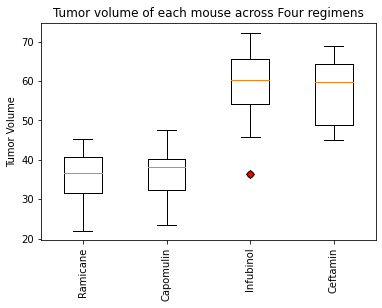

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x=cleaned_mouse_data.query("Drug_Regimen == @treatment[0] & Timepoint==max_time_point")[["Drug_Regimen","Mouse_ID","Tumor_Volume"]]
regimen0=x["Tumor_Volume"]

x=cleaned_mouse_data.query("Drug_Regimen == @treatment[1] & Timepoint==max_time_point")[["Drug_Regimen","Mouse_ID","Tumor_Volume"]]
regimen1=x["Tumor_Volume"]

x=cleaned_mouse_data.query("Drug_Regimen == @treatment[2] & Timepoint==max_time_point")[["Drug_Regimen","Mouse_ID","Tumor_Volume"]]
regimen2=x["Tumor_Volume"]

x=cleaned_mouse_data.query("Drug_Regimen == @treatment[3] & Timepoint==max_time_point")[["Drug_Regimen","Mouse_ID","Tumor_Volume"]]
regimen3=x["Tumor_Volume"]

red_diamond = dict(markerfacecolor='r', marker='D')

data = [regimen0, regimen1, regimen2,regimen3]
fig7, ax7 = plt.subplots()
ax7.boxplot(data)
ax7.set_title('Tumor volume of each mouse across Four regimens')
ax7.set_ylabel('Tumor Volume')
ax7.boxplot(data, flierprops=red_diamond)
x_axis = [1,2,3,4]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatment, rotation='vertical')
plt.show()


In [20]:
#Calculate quartiles and IQR
r0_quartiles = regimen0.quantile([.25,.5,.75])
r0_lowerq = r0_quartiles[0.25]
r0_upperq = r0_quartiles[0.75]
r0_iqr = r0_upperq-r0_lowerq
r0_lower_bound = r0_lowerq - (1.5*r0_iqr)
r0_upper_bound = r0_upperq + (1.5*r0_iqr)


r1_quartiles = regimen1.quantile([.25,.5,.75])
r1_lowerq = r1_quartiles[0.25]
r1_upperq = r1_quartiles[0.75]
r1_iqr = r1_upperq-r1_lowerq
r1_lower_bound = r1_lowerq - (1.5*r1_iqr)
r1_upper_bound = r1_upperq + (1.5*r1_iqr)

r2_quartiles = regimen2.quantile([.25,.5,.75])
r2_lowerq = r2_quartiles[0.25]
r2_upperq = r2_quartiles[0.75]
r2_iqr = r2_upperq-r2_lowerq
r2_lower_bound = r2_lowerq - (1.5*r2_iqr)
r2_upper_bound = r2_upperq + (1.5*r2_iqr)

r3_quartiles = regimen3.quantile([.25,.5,.75])
r3_lowerq = r3_quartiles[0.25]
r3_upperq = r3_quartiles[0.75]
r3_iqr = r3_upperq-r3_lowerq
r3_lower_bound = r3_lowerq - (1.5*r3_iqr)
r3_upper_bound = r3_upperq + (1.5*r3_iqr)

stat_dic={"Drug Regimen": treatment,
         "Lower Quartile": [r0_lowerq,r1_lowerq,r2_lowerq,r3_lowerq],
          "Upper Quartile": [r0_upperq,r1_upperq,r2_upperq,r3_upperq],
          "IQR": [r0_iqr,r1_iqr,r2_iqr,r3_iqr],
          "Lower Bound": [r0_lower_bound,r1_lower_bound,r2_lower_bound,r3_lower_bound],
          "Upper Bound": [r0_upper_bound,r1_upper_bound,r2_upper_bound,r3_upper_bound]
          }


stat_df=pd.DataFrame(stat_dic)


def printmd(string):
    display(Markdown(string))
printmd('***IQR, Lower and Upper Bound of selected Drug Regimen***')

stat_df

***IQR, Lower and Upper Bound of selected Drug Regimen***

,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
0,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
1,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

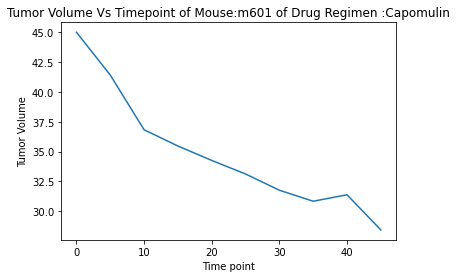

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_m601=cleaned_mouse_data.query("Drug_Regimen == 'Capomulin' & Mouse_ID == 'm601'")[["Tumor_Volume","Timepoint"]]

x_values=Capomulin_m601["Timepoint"]
y_values=Capomulin_m601["Tumor_Volume"]
plt.plot(x_values,y_values)
plt.title('Tumor Volume Vs Timepoint of Mouse:m601 of Drug Regimen :Capomulin')
plt.xlabel("Time point")
plt.ylabel('Tumor Volume')
 

Text(0.5, 0, 'Mouse Weight')

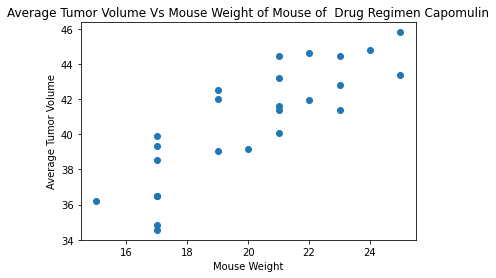

In [22]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_data=cleaned_mouse_data.query("Drug_Regimen == 'Capomulin'")[["Mouse_ID","Weight","Tumor_Volume"]]
Capomulin_data_grp=Capomulin_data.groupby("Mouse_ID")
#Capomulin_data["Weight"]
y_values=Capomulin_data_grp.Tumor_Volume.mean()
x_values=Capomulin_data_grp["Weight"].max()
plt.scatter(x_values,y_values)
plt.title('Average Tumor Volume Vs Mouse Weight of Mouse of  Drug Regimen Capomulin')
plt.ylabel("Average Tumor Volume")
plt.xlabel('Mouse Weight')
#plt.show() 



# Correlation and Regression

The r-squared is: 0.7088568047708717


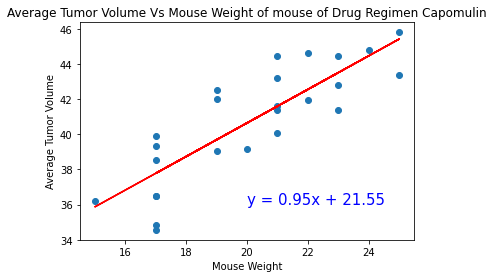

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="blue")
#plt.xlabel('Mouse ID')
#plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.title('Average Tumor Volume Vs Mouse Weight of mouse of Drug Regimen Capomulin')
plt.ylabel("Average Tumor Volume")
plt.xlabel('Mouse Weight')
plt.show()
